## Loading Libraries and Importing Data (Question A)

In [217]:
# Load Libraries

import math
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [218]:
# Import Data and View Data

cen_dat = pd.read_csv (r'C:\Users\ohakw\Desktop\Assignment\Machine Learning and Optimsation CT7205\CensusDB.csv')

In [219]:
#Checking for missing values

cen_dat.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### Exploratory Data Analysis

In [220]:
# Head view of the Census data set

cen_dat.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K


In [221]:
# Checking the dimension of the Census data set

cen_dat.shape

(32561, 14)

In [222]:
# Checking the information of the Census data set

cen_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [223]:
# Checking for some Statistics in the Census data set

cen_dat.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [224]:
cen_dat.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
              'sex','capital-gain','capital-loss','hours-per-week','country','income']

In [225]:
cen_dat.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K


In [226]:
# Checking again for missing values

cen_dat.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
income            0
dtype: int64

In [227]:
# Separating the continuous variables from the categorical variables

print('Continous variables in the dataset are: ')
cont = []
for i in cen_dat.columns:
  if cen_dat[i].dtype == 'int64':
    cont.append(i)
    print(i, end = ', ')
print('\n\nCategorical variable in the dataset are: ')
catg=[]
for i in cen_dat.columns:
  if cen_dat[i].dtype == 'O':
    catg.append(i)
    print(i, end = ',  ')


Continous variables in the dataset are: 
age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week, 

Categorical variable in the dataset are: 
workclass,  education,  marital-status,  occupation,  relationship,  sex,  country,  income,  

### Exploratory Data Analysis For The Contnuous Variables

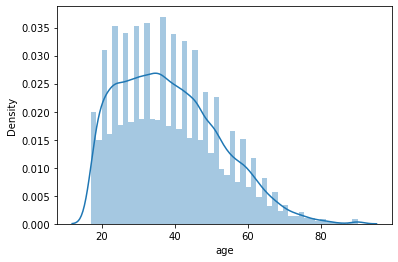

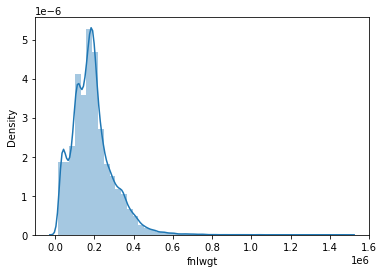

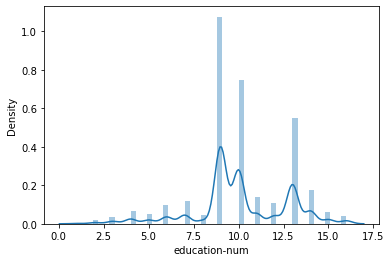

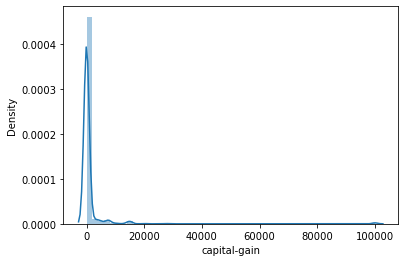

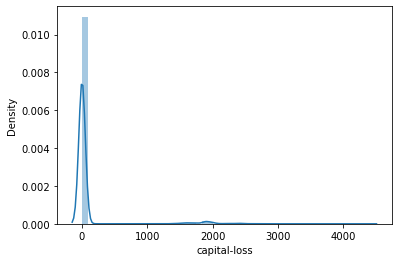

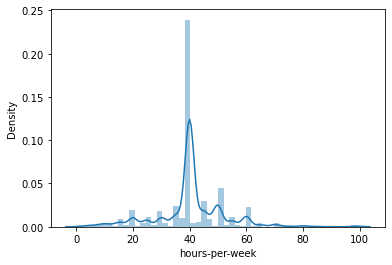

In [228]:
# Visualisation for the continuous variables

for i in cont:
  sns.distplot(cen_dat[i])
  plt.show()

From the above result I can observe :

fnlwgt is just a census number and it is not useful for the model prediction
education-num is ordered-encoding of education variable
presence of outliers in capital gain and capital loss columns


The continous variable which we are including in the final data are:

1. age
2. education-num
3. capital-gain
4. capital-loss
5. hours-per-week

In [229]:
# Copying the old data into a new container

census = cen_dat.copy(deep = True)

In [230]:
# Our Final continuous variables.

cont=['age','education-num','capital-gain','capital-loss','hours-per-week']

### Exploratory Data Analysis For The Categorical Variables

In [231]:
catg

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'country',
 'income']

In [232]:
# Creating a Visualisation function

def catg_vis(dt,cg):
  plt.figure(figsize = (20,5))
  a = dt[dt['income'] == '<=50K'][cg].value_counts() # Below 50k salary
  b = dt[dt['income'] == '>50K'][cg].value_counts() # Above 50k salary
  plt.subplot(1,2,1)
  plt.title('Below 50K salary')
  sns.barplot(a.index,a.values)
  plt.subplot(1,2,2)
  plt.title('Above 50K salary')
  sns.barplot(b.index,b.values)
  plt.show()

workclass :



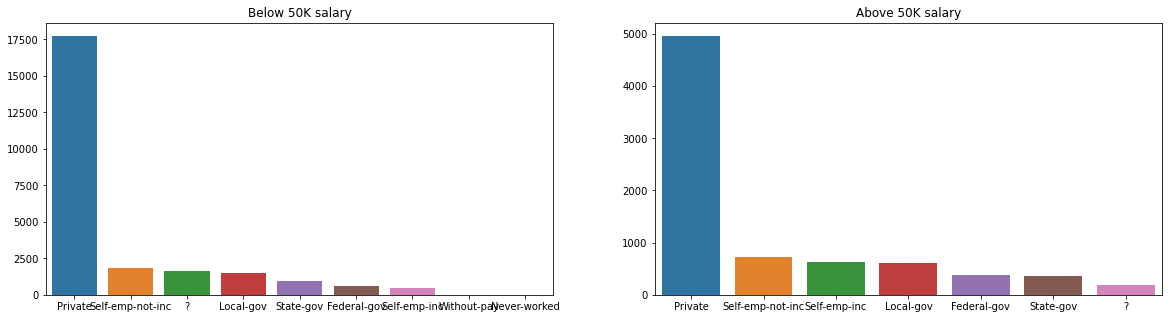

education :



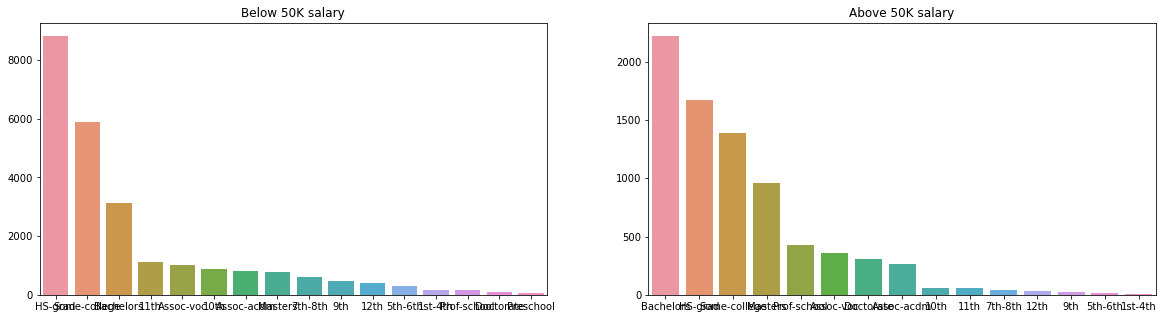

marital-status :



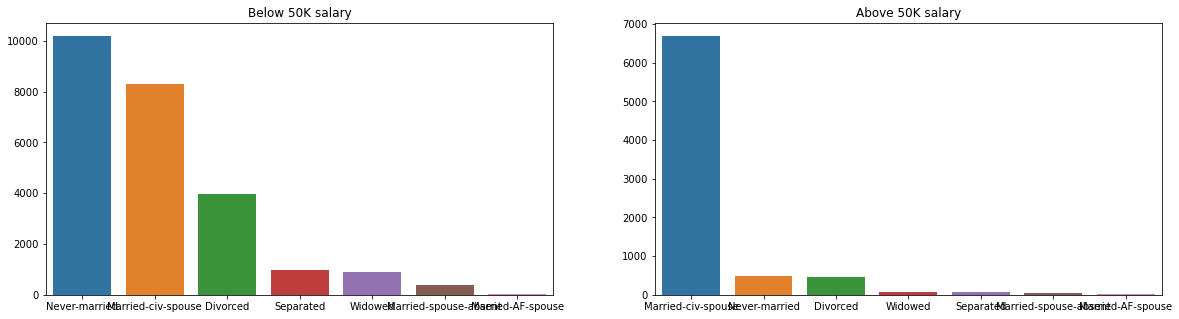

occupation :



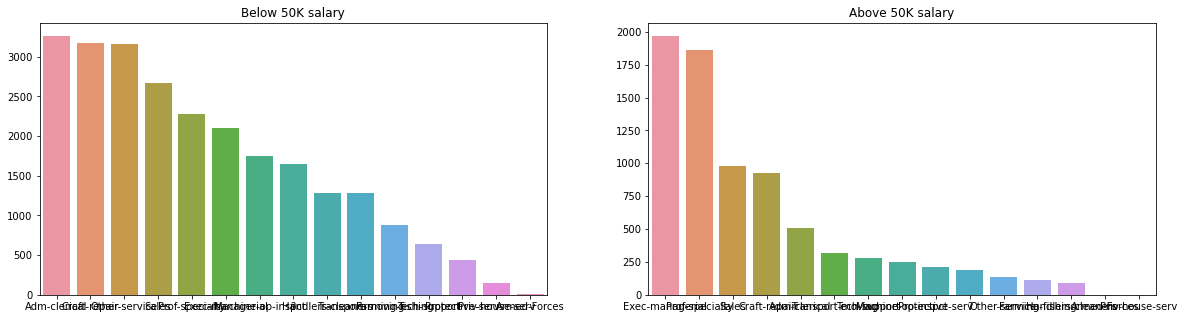

relationship :



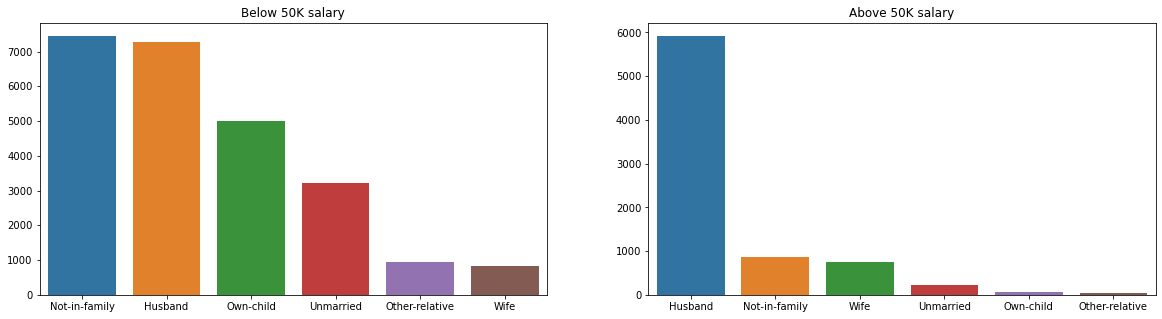

sex :



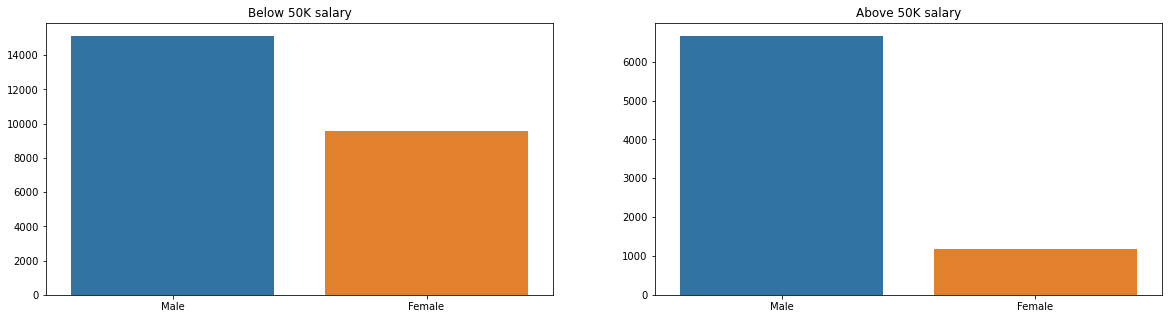

country :



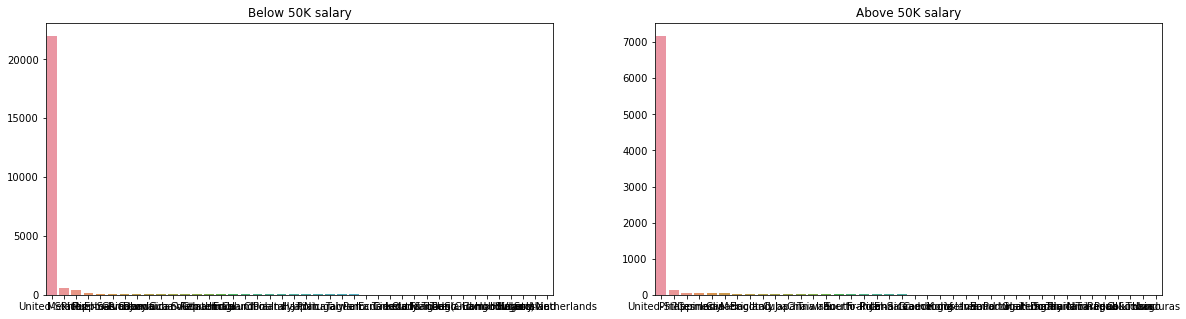

income :



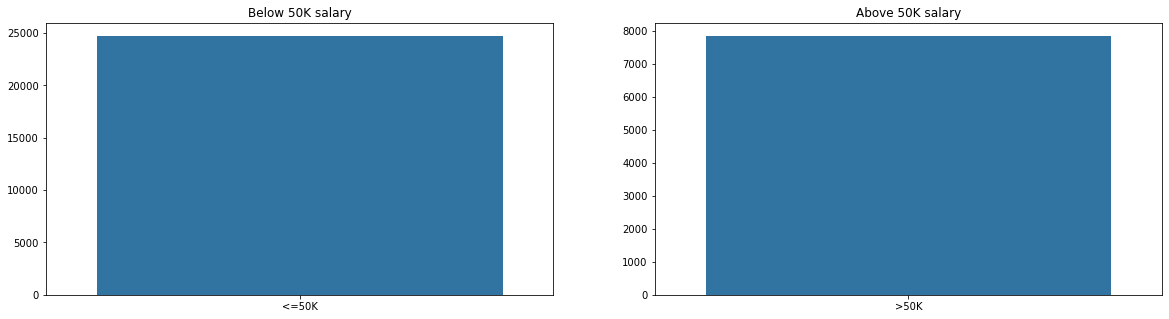

In [233]:
# Visualisation 

for i in catg:
  print(i, ':\n')
  catg_vis(cen_dat,i)

From the visualization of the categorical variables I conclude:

1. we shall drop  workclass , marital-status, relationship , and country because they are not relevant in explaining income 
2. we shall drop education as education-num (continous variable) is already present

In [235]:
# The final categorical variables we shall using in this study

catg = ['occupation', 'sex', 'income']

In [236]:
# Our new data set

census = census[cont+catg]
census.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,occupation,sex,income
0,90,9,0,4356,40,?,Female,<=50K
1,82,9,0,4356,18,Exec-managerial,Female,<=50K
2,66,10,0,4356,40,?,Female,<=50K
3,54,4,0,3900,40,Machine-op-inspct,Female,<=50K
4,41,10,0,3900,40,Prof-specialty,Female,<=50K


## Label Encoder (Question B)

In [237]:
# Coding the categorical variables in numbers (One hot Encoding / Label Encoder)
# Converting the objects in the data to category

census['occupation'] = census['occupation'].astype('category')
census['sex'] = census['sex'].astype('category')
census['income'] = census['income'].astype('category')

census.dtypes

age                  int64
education-num        int64
capital-gain         int64
capital-loss         int64
hours-per-week       int64
occupation        category
sex               category
income            category
dtype: object

In [238]:
# To view the numbers in the categorical variables
# Head view

census['occupation'] = census['occupation'].cat.codes
census['sex'] = census['sex'].cat.codes
census['income'] = census['income'].cat.codes

census.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,occupation,sex,income
0,90,9,0,4356,40,0,0,0
1,82,9,0,4356,18,4,0,0
2,66,10,0,4356,40,0,0,0
3,54,4,0,3900,40,7,0,0
4,41,10,0,3900,40,10,0,0


In [22]:
census.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,occupation,sex,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456,6.572740,0.669205,0.240810
std,13.640433,2.572720,7385.292085,402.960219,12.347429,4.228857,0.470506,0.427581
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,3.000000,0.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,7.000000,1.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,10.000000,1.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,14.000000,1.000000,1.000000


<AxesSubplot:>

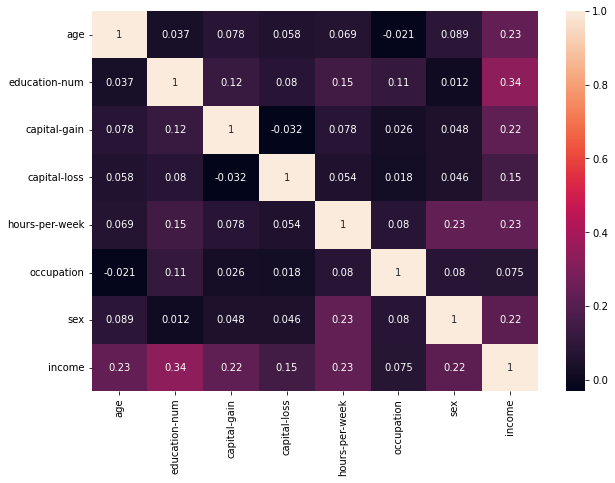

In [242]:
# Calculate correlations between variables

corrmat = census.corr()
fig, ax = plt.subplots(figsize = (10, 7))
sns.heatmap(corrmat, annot = True)

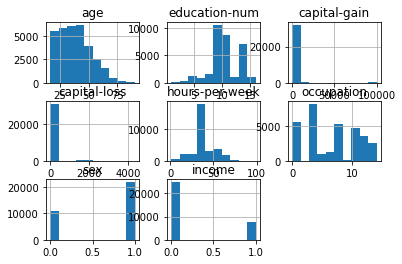

In [24]:
# Plot histograms of each feature

hist = census.hist()

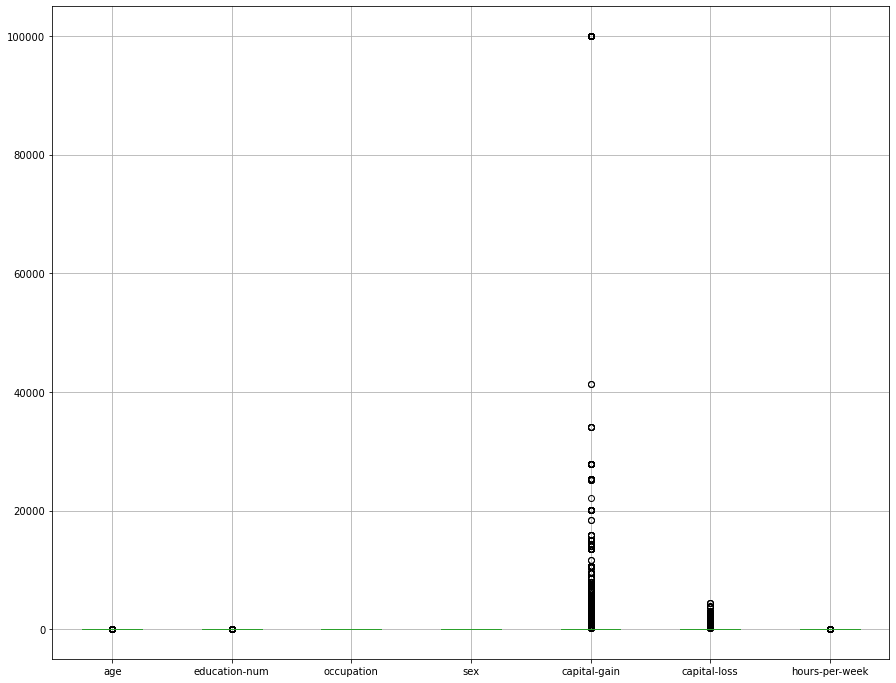

In [85]:
# Plot boxplots for each feature. Are there any outliers?

fig, ax = plt.subplots(figsize = (15, 12))
boxplot = census.boxplot(column = ['age', 'education-num', 'occupation', 'sex', 'capital-gain', 'capital-loss',
                              'hours-per-week'])

## Machine Learning (Question C)

## Classification Model

## (1) Logistic Regression Classifier

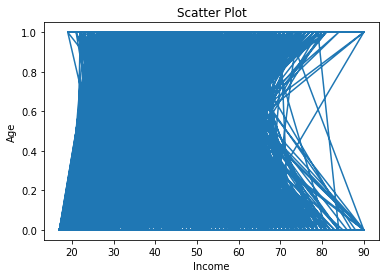

In [289]:
# A scattered plot to see reason why we want to you logistic regression (Income is dependent variable)

plt.plot(census['age'], census['income'])
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Scatter Plot')
plt.show()

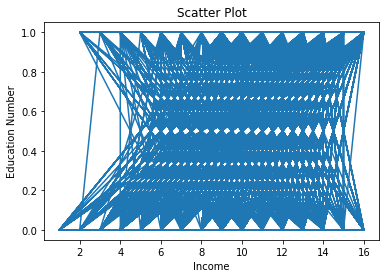

In [290]:
plt.plot(census['education-num'], census['income'])
plt.xlabel('Income')
plt.ylabel('Education Number')
plt.title('Scatter Plot')
plt.show()

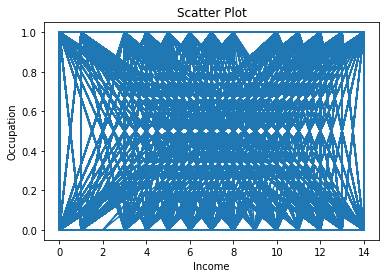

In [291]:
plt.plot(census['occupation'], census['income'])
plt.xlabel('Income')
plt.ylabel('Occupation')
plt.title('Scatter Plot')
plt.show()

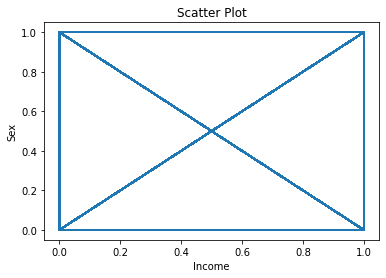

In [292]:
plt.plot(census['sex'], census['income'])
plt.xlabel('Income')
plt.ylabel('Sex')
plt.title('Scatter Plot')
plt.show()

In [29]:
# Create x (predictor), y (response) variables

x = census.drop(['income'], axis = 1)
y = census.income

In [30]:
# Head view of both X (predictor) and y (response) variables

x.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,occupation,sex
0,90,9,0,4356,40,0,0
1,82,9,0,4356,18,4,0
2,66,10,0,4356,40,0,0
3,54,4,0,3900,40,7,0
4,41,10,0,3900,40,10,0


In [31]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int8

In [32]:
# Divide the dataset into train and test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [33]:
# Feature scaling (To scale the data)

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [183]:
# check for distribution of labels

y_train.value_counts(normalize = True)

0    0.759521
1    0.240479
Name: income, dtype: float64

In [34]:
# Perform logistic regression
# Make instance of model with default parameters except class weight
# As we will add class weights due to class imbalance problem

lr_model = LogisticRegression(class_weight = {0:0.2, 1:0.8})
lr_model.fit(x_train, y_train)

LogisticRegression(class_weight={0: 0.2, 1: 0.8})

In [35]:
# Predicting using the testing dataset

y_pred = lr_model.predict(x_test)

In [36]:
# Comparing the predicted income with the actual income

comp = pd.DataFrame({'Predicted Income':y_pred, 'Actual Income': y_test})
comp

,Predicted Income,Actual Income
16054,1,1
32382,1,0
10749,0,0
15377,1,0
29660,0,0
...,...,...
29785,1,1
8912,1,0
12599,1,1
20781,0,0


              precision    recall  f1-score   support

           0       0.92      0.71      0.80      4936
           1       0.47      0.80      0.59      1577

    accuracy                           0.73      6513
   macro avg       0.69      0.76      0.70      6513
weighted avg       0.81      0.73      0.75      6513



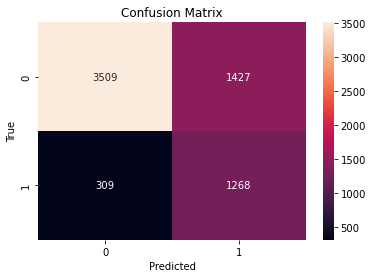

In [87]:
# Calculating model accuracy using confusion matrix 

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot = True, fmt = "d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))

### Optimisation For Logistic Regression Classifier (Question D)

In [38]:
%%time

# Hyperparameter tuning
# Define model/create instance

lr = LogisticRegression()

# Tuning weight for minority class then weight for majority class will be 1-weight of minority class
# Setting the range for class weights

weights = np.linspace(0.0,0.99,500)

# Specifying all hyperparameters with possible values

param = {'C': [0.1, 0.5, 1,10,15,20], 'penalty': ['l1', 'l2'],"class_weight":[{0:x, 1:1.0 -x} for x in weights]}

# Create 5 folds

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# Gridsearch for hyperparam tuning

model = GridSearchCV(estimator = lr, param_grid = param, scoring = "f1", cv = folds, return_train_score = True)

# Train model to learn relationships between x and y

model.fit(x_train, y_train)

CPU times: total: 8min 43s
Wall time: 9min 8s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 15, 20],
                         'class_weight': [{0: 0.0, 1: 1.0},
                                          {0: 0.0019839679358717435,
                                           1: 0.9980160320641283},
                                          {0: 0.003967935871743487,
                                           1: 0.9960320641282565},
                                          {0: 0.0059519038076152305,
                                           1: 0.9940480961923848},
                                          {0: 0.007935871743486974,
                                           1: 0.99206412825...
                                           1: 0.9543687374749499},
                                          {0: 0.047615230460921844,
                                           1: 0.9523847695390781},
                      

In [88]:
# Predicting using the testing dataset (After Optimisation)

y_pred1 = model.predict(x_test)

In [89]:
# Comparing the predicted income with the actual income (After Optimisation)

comp_new = pd.DataFrame({'Predicted Income':y_pred1, 'Actual Income': y_test})
comp_new

,Predicted Income,Actual Income
16054,1,1
32382,0,0
10749,0,0
15377,1,0
29660,0,0
...,...,...
29785,1,1
8912,0,0
12599,1,1
20781,0,0


              precision    recall  f1-score   support

           0       0.89      0.81      0.85      4936
           1       0.54      0.69      0.61      1577

    accuracy                           0.78      6513
   macro avg       0.72      0.75      0.73      6513
weighted avg       0.81      0.78      0.79      6513



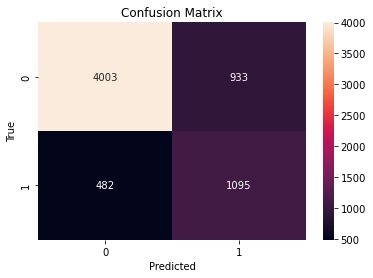

In [90]:
# Calculating model accuracy using confusion matrix (After Optimisation)

matrix = confusion_matrix(y_test, y_pred1)
sns.heatmap(matrix, annot = True, fmt = "d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred1))

## (2) Support Vector Classifier (SVM) 

In [91]:
# Fit an SVM model with sigmoid kernel
# Create a SVM Classifier

clf = SVC(kernel = 'linear', gamma = 'auto') # linear sets

# Train the model using the training sets

clf.fit(x_train, y_train)

SVC(gamma='auto', kernel='linear')

In [92]:
# Predicting using the testing dataset

y1_pred = clf.predict(x_test)

In [93]:
# Comparing the predicted income with the actual income

comp1 = pd.DataFrame({'Predicted Income':y1_pred, 'Actual Income': y_test})
comp1

,Predicted Income,Actual Income
16054,0,1
32382,0,0
10749,0,0
15377,0,0
29660,0,0
...,...,...
29785,0,1
8912,0,0
12599,0,1
20781,0,0


              precision    recall  f1-score   support

           0       0.81      0.98      0.89      4936
           1       0.79      0.30      0.44      1577

    accuracy                           0.81      6513
   macro avg       0.80      0.64      0.66      6513
weighted avg       0.81      0.81      0.78      6513



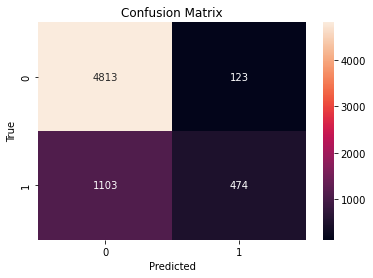

In [299]:
# Calculating model accuracy using confusion matrix 

matrix = confusion_matrix(y_test, y1_pred)
sns.heatmap(matrix, annot = True, fmt = "d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y1_pred))

### Optimisation For Support Vector Classifier (SVM) (Question D)

In [95]:
%%time

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

grid = RandomizedSearchCV(SVC(), param_grid, n_iter = 2, cv = 2, verbose = 2, random_state = 2)
grid.fit(x_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   5.4s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   5.4s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   8.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   8.0s
CPU times: total: 48.1 s
Wall time: 48.3 s


RandomizedSearchCV(cv=2, estimator=SVC(), n_iter=2,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf', 'poly', 'sigmoid']},
                   random_state=2, verbose=2)

In [96]:
# Predicting with the optimised model

g_pred = grid.predict(x_test)

In [97]:
# Comparing the predicted income with the actual income

comp2 = pd.DataFrame({'Predicted Income':g_pred, 'Actual Income': y_test})
comp2

,Predicted Income,Actual Income
16054,0,1
32382,0,0
10749,0,0
15377,0,0
29660,0,0
...,...,...
29785,0,1
8912,0,0
12599,0,1
20781,0,0


              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4936
           1       0.75      0.49      0.59      1577

    accuracy                           0.84      6513
   macro avg       0.80      0.72      0.74      6513
weighted avg       0.83      0.84      0.82      6513



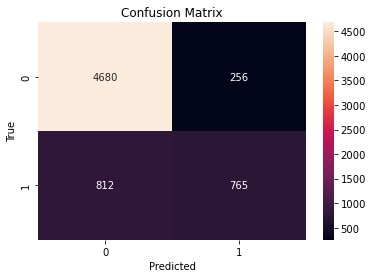

In [98]:
# Calculating model accuracy using confusion matrix 

matrix = confusion_matrix(y_test, g_pred)
sns.heatmap(matrix, annot = True, fmt = "d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, g_pred))

In [50]:
?

## Clustering Model

## (1) K-Means Clustering

In [244]:
# Since clustering is an unsupervised method, the response variable is usually not there
# Therefore, we will drop the response column (income)

census1 = census.copy(deep = True)
census1.drop(['income'], axis = 1, inplace = True)

In [245]:
census1.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,occupation,sex
0,90,9,0,4356,40,0,0
1,82,9,0,4356,18,4,0
2,66,10,0,4356,40,0,0
3,54,4,0,3900,40,7,0
4,41,10,0,3900,40,10,0


In [246]:
# View information of the data

census1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   education-num   32561 non-null  int64
 2   capital-gain    32561 non-null  int64
 3   capital-loss    32561 non-null  int64
 4   hours-per-week  32561 non-null  int64
 5   occupation      32561 non-null  int8 
 6   sex             32561 non-null  int8 
dtypes: int64(5), int8(2)
memory usage: 1.3 MB


In [250]:
#Perform feature scaling

sc = StandardScaler()
census2 = sc.fit_transform(census1)
census2

array([[ 3.76961234, -0.42005962, -0.14592048, ..., -0.03542945,
        -1.55428326, -1.42233076],
       [ 3.18311167, -0.42005962, -0.14592048, ..., -1.81720429,
        -0.60838662, -1.42233076],
       [ 2.01011032, -0.03136003, -0.14592048, ..., -0.03542945,
        -1.55428326, -1.42233076],
       ...,
       [ 0.10398314, -0.42005962, -0.14592048, ..., -0.03542945,
         0.10103586,  0.70307135],
       [ 1.42360965, -0.42005962, -0.14592048, ..., -0.03542945,
        -1.3178091 , -1.42233076],
       [-1.21564337, -0.42005962, -0.14592048, ..., -1.65522476,
        -1.3178091 ,  0.70307135]])

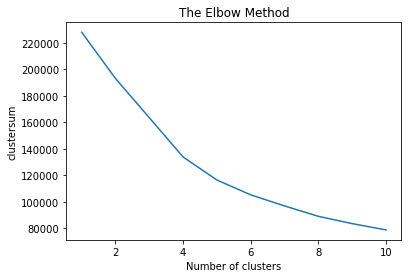

In [249]:
# Elbow method test for optimal K selection

from sklearn.cluster import KMeans
clustersum = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(census2)
    clustersum.append(kmeans.inertia_)
plt.plot(range(1, 11), clustersum)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('clustersum')
plt.show()

In [255]:
# Apply K-means clustering using sklearn.cluster

actual = census['income']
kmeans = KMeans(n_clusters = 3, random_state = 42)
y_kmeans = kmeans.fit_predict(census2)

In [256]:
# Model Acuracy 

kmeans_performance = metrics.accuracy_score(y_kmeans , actual)
kmeans_performance

0.47087005927336384

              precision    recall  f1-score   support

           0       0.90      0.38      0.53     24720
           1       0.29      0.76      0.42      7841
           2       0.00      0.00      0.00         0

    accuracy                           0.47     32561
   macro avg       0.40      0.38      0.32     32561
weighted avg       0.75      0.47      0.50     32561



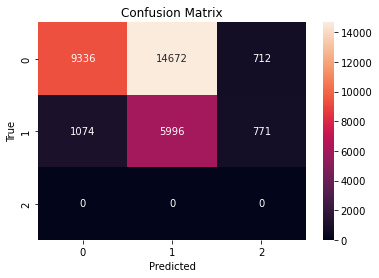

In [293]:
# Calculating model accuracy using confusion matrix 

matrix = confusion_matrix(actual, y_kmeans)
sns.heatmap(matrix, annot = True, fmt = "d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(actual, y_kmeans))

In [257]:
# Comparing the predicted income with the actual income

com = pd.DataFrame({'Predicted Income':y_kmeans, 'Actual Income': actual})
com

,Predicted Income,Actual Income
0,2,0
1,2,0
2,2,0
3,2,0
4,2,0
...,...,...
32556,1,0
32557,0,0
32558,1,1
32559,0,0


In [58]:
# Get the cluster centres

kmeans.cluster_centers_

array([[-0.13223143, -0.02908213, -0.07021054, -0.21272614, -0.33785141,
        -0.12017165, -1.42233076],
       [ 0.05050883, -0.01067351,  0.04582813, -0.21605415,  0.15316397,
         0.05431079,  0.70091191],
       [ 0.22416041,  0.35288381, -0.14592048,  4.50430853,  0.23664811,
         0.0865253 ,  0.21435785]])

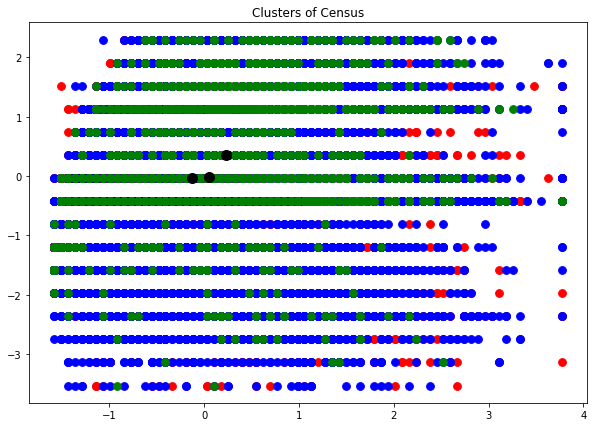

In [59]:
# Plot the points and calculated cluster centers in a scatter plot which differentiate clusters by colour

plt.figure(figsize = (10, 7))
plt.scatter(census2[y_kmeans == 0, 0], census2[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster 1')
plt.scatter(census2[y_kmeans == 1, 0], census2[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster 2')
plt.scatter(census2[y_kmeans == 2, 0], census2[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters of Census')
plt.show()

## Optimisation Of The K-Means Clustering (Question D)

In [251]:
# Apply K-means clustering using sklearn.cluster (Optimising)

kmeans1 = KMeans(n_clusters = 2, random_state = 42)
y_kmeans1 = kmeans1.fit_predict(census2)

In [252]:
# Model Acuracy (After Optimisation)

kmeans_performance1 = metrics.accuracy_score(y_kmeans1 , actual)
kmeans_performance1

0.4987868922944627

              precision    recall  f1-score   support

           0       0.89      0.39      0.54     24720
           1       0.31      0.85      0.45      7841

    accuracy                           0.50     32561
   macro avg       0.60      0.62      0.49     32561
weighted avg       0.75      0.50      0.52     32561



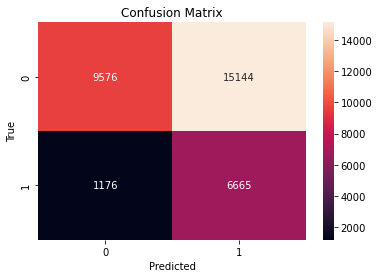

In [294]:
# Calculating model accuracy using confusion matrix 

matrix = confusion_matrix(actual, y_kmeans1)
sns.heatmap(matrix, annot = True, fmt = "d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(actual, y_kmeans1))

In [253]:
# Get the cluster centres (After Optimisation)

kmeans1.cluster_centers_

array([[-0.12761426, -0.01834553, -0.07136642, -0.06454352, -0.33443324,
        -0.11498434, -1.42233076],
       [ 0.06291478,  0.00904448,  0.03518418,  0.03182044,  0.16487809,
         0.05668814,  0.70121969]])

In [254]:
# Comparing the predicted income with the actual income

com1 = pd.DataFrame({'Predicted Income':y_kmeans1, 'Actual Income': actual})
com1

,Predicted Income,Actual Income
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
32556,1,0
32557,0,0
32558,1,1
32559,0,0


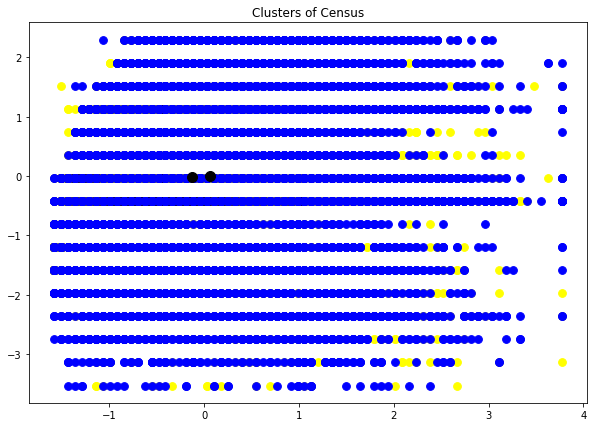

In [62]:
# Plot the points and calculated cluster centers in a scatter plot which differentiate clusters by colour (After Optimisation)

plt.figure(figsize = (10, 7))
plt.scatter(census2[y_kmeans1 == 0, 0], census2[y_kmeans1 == 0, 1], s = 60, c = 'yellow', label = 'Cluster 1')
plt.scatter(census2[y_kmeans1 == 1, 0], census2[y_kmeans1 == 1, 1], s = 60, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters of Census')
plt.show()

## (2) Hierarchy Clustering Using Dendrogram

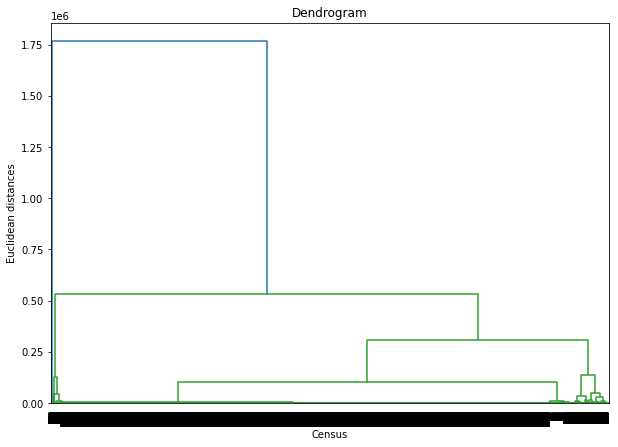

In [260]:
plt.figure(figsize = (10, 7))

dendrogram = sch.dendrogram(sch.linkage(census1, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Census')
plt.ylabel('Euclidean distances')
plt.show()

In [64]:
# Perform Agglomerative Clustering

cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
cl = cluster.fit_predict(census2)

In [65]:
# Model Accuracy 

hcl_performance = metrics.accuracy_score(cl , actual)
hcl_performance

0.4910168606615276

              precision    recall  f1-score   support

           0       0.71      0.61      0.65     24720
           1       0.10      0.13      0.11      7841
           2       0.00      0.00      0.00         0

    accuracy                           0.49     32561
   macro avg       0.27      0.24      0.26     32561
weighted avg       0.56      0.49      0.52     32561



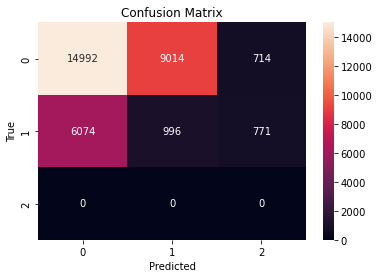

In [295]:
# Calculating model accuracy using confusion matrix 

matrix = confusion_matrix(actual, cl)
sns.heatmap(matrix, annot = True, fmt = "d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(actual, cl))

In [258]:
# Comparing the predicted income with the actual income

hcl_com = pd.DataFrame({'Predicted Income':cl, 'Actual Income': actual})
hcl_com

,Predicted Income,Actual Income
0,2,0
1,2,0
2,2,0
3,2,0
4,2,0
...,...,...
32556,0,0
32557,1,0
32558,0,1
32559,1,0


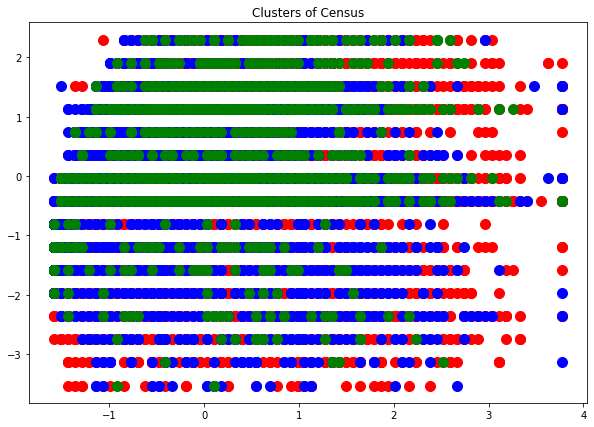

In [66]:
plt.figure(figsize = (10, 7))
plt.scatter(census2[cl == 0, 0], census2[cl == 0, 1], s = 100, c = 'red', label = 'cluster 1')
plt.scatter(census2[cl == 1, 0], census2[cl == 1, 1], s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(census2[cl == 2, 0], census2[cl == 2, 1], s = 100, c = 'green', label = 'cluster 3')
plt.title('Clusters of Census')
plt.show()

## Optimisation Of The Hierarchy Clustering (Question D)

In [67]:
# Perform Agglomerative Clustering (Optimising)

cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
cl1 = cluster.fit_predict(census2)

In [68]:
# Model Accuracy (After Optimisation)

hcl_performance1 = metrics.accuracy_score(cl1 , actual)
hcl_performance1

0.5129449341236448

              precision    recall  f1-score   support

           0       0.70      0.64      0.66     24720
           1       0.10      0.13      0.11      7841

    accuracy                           0.51     32561
   macro avg       0.40      0.38      0.39     32561
weighted avg       0.55      0.51      0.53     32561



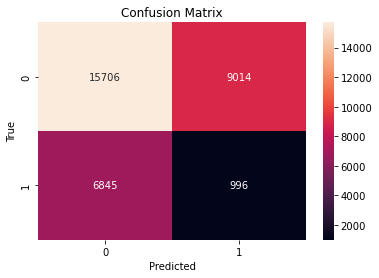

In [296]:
# Calculating model accuracy using confusion matrix 

matrix = confusion_matrix(actual, cl1)
sns.heatmap(matrix, annot = True, fmt = "d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(actual, cl1))

In [259]:
# Comparing the predicted income with the actual income

hcl_com1 = pd.DataFrame({'Predicted Income':cl1, 'Actual Income': actual})
hcl_com1

,Predicted Income,Actual Income
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
32556,0,0
32557,1,0
32558,0,1
32559,1,0


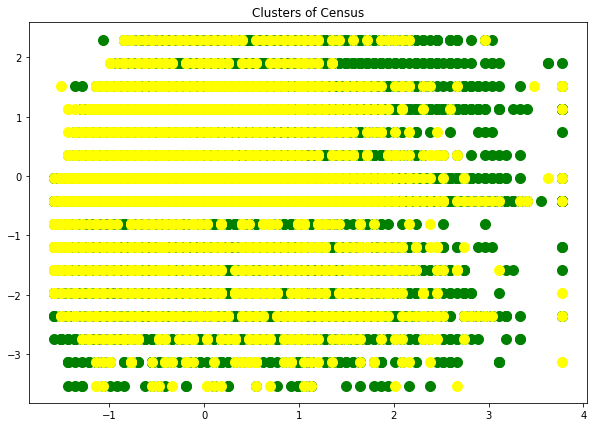

In [69]:
plt.figure(figsize = (10, 7))
plt.scatter(census2[cl1 == 0, 0], census2[cl1 == 0, 1], s = 100, c = 'green', label = 'cluster 1')
plt.scatter(census2[cl1 == 1, 0], census2[cl1 == 1, 1], s = 100, c = 'yellow', label = 'cluster 2')
plt.title('Clusters of Census')
plt.show()

## (3) Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

In [266]:
# Trying DBSCAN

neigh = NearestNeighbors(n_neighbors = 3)
nbrs = neigh.fit(census2)
distances, indices = nbrs.kneighbors(census2)

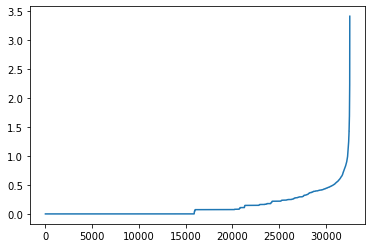

In [267]:
# Distance

distances = np.sort(distances, axis = 0)
distances = distances[:, 1]
plt.plot(distances)

In [268]:
# Fitting the DBSCAN 

dbscancluster = DBSCAN(eps = 2, min_samples = 3)
dbscancluster.fit(census2)
clusters = dbscancluster.labels_

In [269]:
# Checking for number of clusters

len(set(clusters))

5

In [270]:
# Model Accuracy 

dbscan_performance = metrics.accuracy_score(clusters , actual)
dbscan_performance

0.49989250944381314

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.70      0.61      0.65     24720
           1       0.11      0.15      0.12      7841
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.50     32561
   macro avg       0.16      0.15      0.16     32561
weighted avg       0.56      0.50      0.53     32561



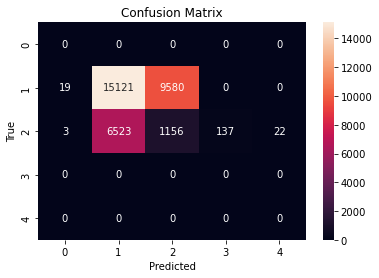

In [297]:
# Calculating model accuracy using confusion matrix 

matrix = confusion_matrix(actual, clusters)
sns.heatmap(matrix, annot = True, fmt = "d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(actual, clusters))

In [271]:
# Comparing the predicted income with the actual income

dbscan_com = pd.DataFrame({'Predicted Income':clusters, 'Actual Income': actual})
dbscan_com

,Predicted Income,Actual Income
0,-1,0
1,-1,0
2,-1,0
3,-1,0
4,-1,0
...,...,...
32556,0,0
32557,1,0
32558,0,1
32559,1,0


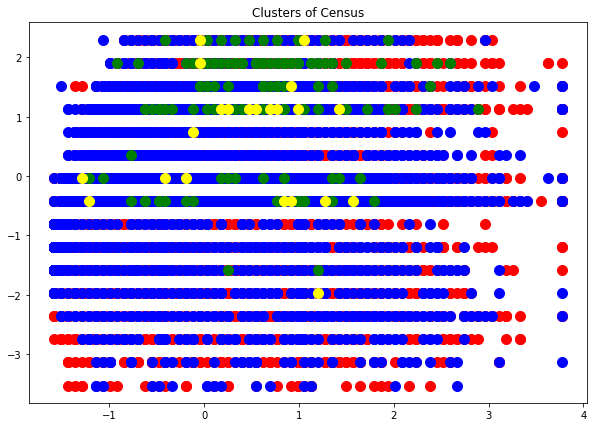

In [272]:
plt.figure(figsize = (10, 7))
plt.scatter(census2[clusters == 0, 0], census2[clusters == 0, 1], s = 100, c = 'red', label = 'cluster 1')
plt.scatter(census2[clusters == 1, 0], census2[clusters == 1, 1], s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(census2[clusters == 2, 0], census2[clusters == 2, 1], s = 100, c = 'green', label = 'cluster 3')
plt.scatter(census2[clusters == 3, 0], census2[clusters == 3, 1], s = 100, c = 'yellow', label = 'cluster 4')
plt.scatter(census2[clusters == 4, 0], census2[clusters == 4, 1], s = 100, c = 'purple', label = 'cluster 5')
plt.title('Clusters of Census')
plt.show()

## Optimisation Of Density-Based Spatial Clustering of Applications with Noise (DBSCAN) (Question D)

In [281]:
# Fitting the DBSCAN (Optimising)

dbscancluster1 = DBSCAN(eps = 7, min_samples = 5)
dbscancluster1.fit(census2)
clusters1 = dbscancluster1.labels_

# Checking for number of clusters

len(set(clusters1))

# Model Accuracy (After Optimisation)

dbscan_performance1 = metrics.accuracy_score(clusters1 , actual)
dbscan_performance1

In [282]:
# Checking for number of clusters

len(set(clusters1))

2

In [275]:
# Model Accuracy (After Optimisation)

dbscan_performancea1 = metrics.accuracy_score(clusters1 , actual)
dbscan_performance1

0.7640735849636068

              precision    recall  f1-score   support

           0       0.76      1.00      0.87     24720
           1       1.00      0.02      0.04      7841

    accuracy                           0.76     32561
   macro avg       0.88      0.51      0.45     32561
weighted avg       0.82      0.76      0.67     32561



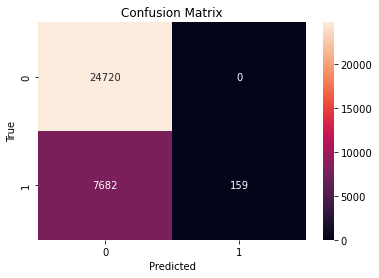

In [298]:
# Calculating model accuracy using confusion matrix 

matrix = confusion_matrix(actual, clusters1)
sns.heatmap(matrix, annot = True, fmt = "d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(actual, clusters1))

In [283]:
# Comparing the predicted income with the actual income

dbscan_com1 = pd.DataFrame({'Predicted Income':clusters1, 'Actual Income': actual})
dbscan_com1

,Predicted Income,Actual Income
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
32556,0,0
32557,0,0
32558,0,1
32559,0,0


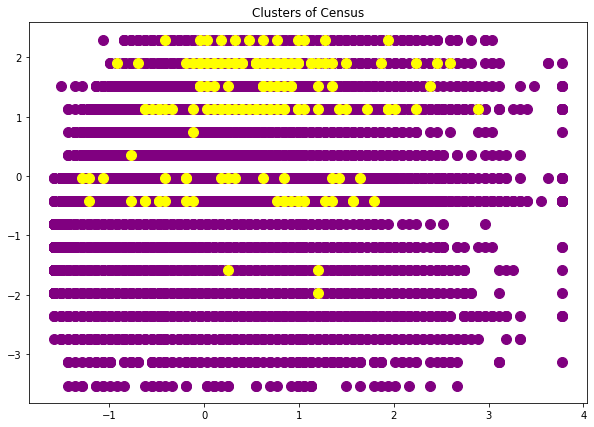

In [276]:
plt.figure(figsize = (10, 7))
plt.scatter(census2[clusters1 == 0, 0], census2[clusters1 == 0, 1], s = 100, c = 'purple', label = 'cluster 1')
plt.scatter(census2[clusters1 == 1, 0], census2[clusters1 == 1, 1], s = 100, c = 'yellow', label = 'cluster 2')
plt.title('Clusters of Census')
plt.show()

## Neural Network Model

## (1) Multi-Layer Perceptron Classifier (MLP) 

In [184]:
# Fitting the MLP Classifier model

mlp_nn = MLPClassifier(random_state = 2, max_iter = 10)
mlp_nn.fit(x_train, y_train)

MLPClassifier(max_iter=10, random_state=2)

In [185]:
# Predicting with the model

y2_pred = mlp_nn.predict(x_test)

In [186]:
# Comparing the predicted income with the actual income

comp3 = pd.DataFrame({'Predicted Income':y2_pred, 'Actual Income': y_test})
comp3

,Predicted Income,Actual Income
16054,1,1
32382,0,0
10749,0,0
15377,0,0
29660,0,0
...,...,...
29785,0,1
8912,0,0
12599,0,1
20781,0,0


              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4936
           1       0.71      0.52      0.60      1577

    accuracy                           0.83      6513
   macro avg       0.78      0.73      0.75      6513
weighted avg       0.82      0.83      0.82      6513



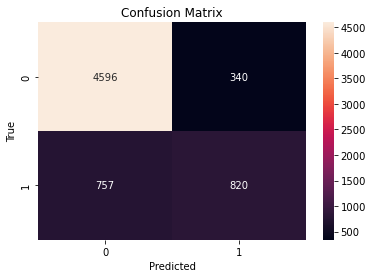

In [187]:
# Checking for Accuracy

matrix = confusion_matrix(y_test, y2_pred)
sns.heatmap(matrix, annot = True, fmt = "d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y2_pred))

## Optimisation For Multi-Layer Perceptron Classifier (MLP)  (Question D)

In [284]:
%%time

# Hyperparameter tuning for model optimisation. 

mlp_gs = MLPClassifier(max_iter = 400, random_state = 2)
parameter_space = {
    'hidden_layer_sizes': [(60,60,60),(60,120,60),(150,)],
    'activation': ['tanh', 'relu', 'logistic', 'identity'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.05, 0.5, 0.1],
    'learning_rate': ['constant','adaptive'],
}

mlf = RandomizedSearchCV(estimator = mlp_gs, param_distributions = parameter_space, n_iter = 30, 
                         n_jobs = -1, cv = 10, random_state = 2, verbose = 2)
mlf.fit(x_train, y_train) 

Fitting 10 folds for each of 30 candidates, totalling 300 fits
CPU times: total: 5min 2s
Wall time: 48min 52s


RandomizedSearchCV(cv=10, estimator=MLPClassifier(max_iter=400, random_state=2),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu',
                                                       'logistic', 'identity'],
                                        'alpha': [0.0001, 0.05, 0.5, 0.1],
                                        'hidden_layer_sizes': [(60, 60, 60),
                                                               (60, 120, 60),
                                                               (150,)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['sgd', 'adam', 'lbfgs']},
                   random_state=2, verbose=2)

In [285]:
# Predicting Optimised model

mlf_pred = mlf.predict(x_test)

In [286]:
# Comparing the predicted income with the actual income (After Optimisation)

comp4 = pd.DataFrame({'Predicted Income':mlf_pred, 'Actual Income': y_test})
comp4

,Predicted Income,Actual Income
16054,0,1
32382,0,0
10749,0,0
15377,0,0
29660,0,0
...,...,...
29785,0,1
8912,0,0
12599,0,1
20781,0,0


              precision    recall  f1-score   support

           0       0.85      0.94      0.90      4936
           1       0.74      0.50      0.59      1577

    accuracy                           0.84      6513
   macro avg       0.80      0.72      0.75      6513
weighted avg       0.83      0.84      0.82      6513



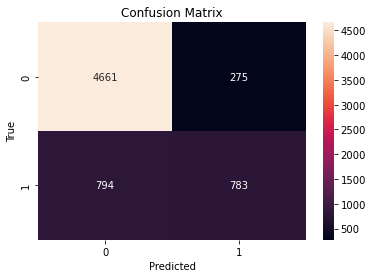

In [287]:
# Checking for Accuracy (After Optimisation)

matrix = confusion_matrix(y_test, mlf_pred)
sns.heatmap(matrix, annot = True, fmt = "d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, mlf_pred))

## Checking which model performed better both before and after optimisation

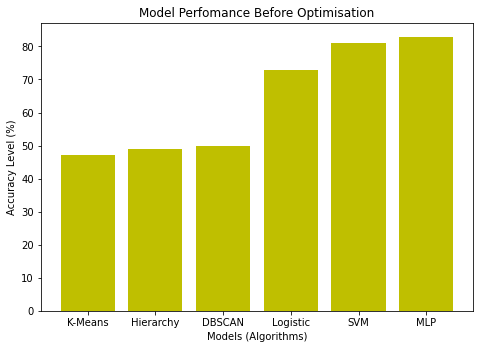

In [306]:
# Before Optimisation.

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['K-Means', 'Hierarchy', 'DBSCAN', 'Logistic', 'SVM', 'MLP']
model_score = [47, 49, 50, 73, 81, 83]
ax.bar(models, model_score, color = 'y')
plt.xlabel('Models (Algorithms)')
plt.ylabel('Accuracy Level (%)')
plt.title('Model Perfomance Before Optimisation')
plt.show()

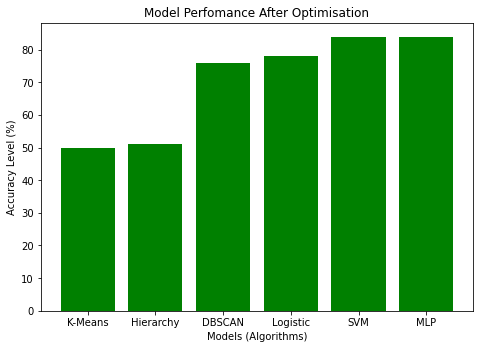

In [307]:
# After Optimisation.

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['K-Means', 'Hierarchy', 'DBSCAN', 'Logistic', 'SVM', 'MLP']
model_score = [50, 51, 76, 78, 84, 84]
ax.bar(models, model_score, color = 'g')
plt.xlabel('Models (Algorithms)')
plt.ylabel('Accuracy Level (%)')
plt.title('Model Perfomance After Optimisation')
plt.show()